<a href="https://colab.research.google.com/github/ysokr1001/python/blob/main/0527_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5%2C_%EC%9E%90%EB%8F%99%EC%B0%A8_%EC%97%B0%EB%B9%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[array([6.04105263, 2.99368421]), array([6.605, 3.555]), array([4.87142857, 2.94571429])]
<class 'list'>
[(6.122428984455602, 2.5959223113793595), (6.74503035054096, 4.066200474004219), (5.098345541888557, 2.0558578050542815)]
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


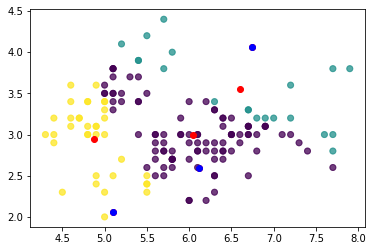

IndexError: ignored

In [34]:
import numpy as np

#함수 distance는 임의로 찍어준 두 포인트 사이의 거리를 계산(뭐가 더 가까운지)
def distance(a, b):
  return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a,b))]) ** 0.5

from matplotlib import pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
x = samples[:, 0]
y = samples[:,1]

centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

k=3

labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x,y)))

for i in range(len(samples)):
  distances = np.zeros(k)
  for j in range(k):
    distances[j] = distance(sepal_length_width[i], centroids[j])
  cluster = np.argmin(distances)
  labels[i] = cluster

plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c = 'red')
plt.show

#임의가 아닌 새로운 중심값 그리기
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis = 0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

#기존 centroids_old와 centroids 위치 비교
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))

plt.scatter(x, y, c = labels, alpha = 0.5) #기존 데이터들을 x, y값으로 받아서 그래프에 표현 
plt.scatter(centroids[:, 0 ], centroids[:, 1], c = 'red') #x,y값이 이미 들어있으므로 값 불러오기
plt.scatter(centroids_old[:, 0], centroids_old[:,1], c='blue') #이전에 찍었던 값(old)
plt.show()

centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
  error[i] = distance(centroids_old[i], centroids[i])

k=3
while(error.all() !=0):
  for i in range(len(samples)):
    distances = np.zeros(k)
    for j in range(k):
      distances[j] = distance(sepal_length_width[i], centroids[i])
    cluster = np.argmin(distances)
    labels[i] = cluster
  centroids_old = deepcopy(centroids)
  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j]==i]
    centroids[i] = np.mean(points, axis=0)

  for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

colors = ['r', 'g' ,'b']
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j]==i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], marker="D", s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal wdth (cm)')
plt.show()

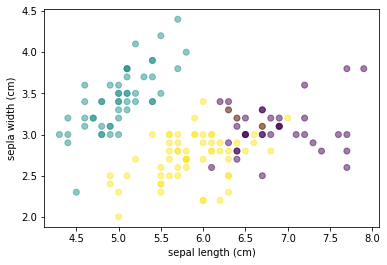

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0              2            36
1               50              0             0
2                0             48            14


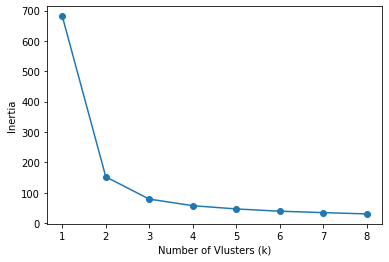

In [44]:
#위 코드를 KMeans로 간단하게 결과 도출 (keras 아님!)

import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans

irit = datasets. load_iris()
samples = iris.data
model = KMeans(n_clusters = 3)

model.fit(samples)

labels = model.predict(samples)

x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c = labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepla width (cm)')
plt.show()

target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

import pandas as pd
df = pd.DataFrame({'labels': labels, 'species':species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

num_cluster = list(range(1, 9))

inertias = []

for i in num_cluster:
  model = KMeans(n_clusters=i)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_cluster, inertias, '-o')
plt.xlabel("Number of Vlusters (k)")
plt.ylabel("Inertia")
plt.show()

In [60]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pathlib
import seaborn as sns


dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG', "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
print(dataset.tail())

# loss = 'mse'
# optimizer = tf.keras.optimizers.RMSprop(0.001)

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = dataset.sample(frac=1)

n_dataset = df.values
X = n_dataset[:, 0:8]
Y = n_dataset[:, 0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) 

model.compile(loss = 'mse', optimizer='RMSprop', metrics=['mae'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=10)

hist = pd.DataFrame(history.history)
print(hist.tail())

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제: {:.3f}, 예상: {:.3f}".format(label, prediction))


      MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[5 rows x 8 columns]
Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 18559.9180 - mae: 99.1202
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 189.6194 - mae: 11.4912
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 291.0469 - mae: 13.4225
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 206.6324 - mae: 11.5944
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 214.0613 - mae: 11.8832
Epoch 6/100
28/28 [============================

32768/30286 [================================] - 0s 2us/step
      MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[5 rows x 8 columns]
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
              count         mean         std  ...     50%      75%     max
Cylinders     314.0     5.477707    1.699788  ...     4.0     8.00     8.0
Displacement  314.0   195.318471  104.331589  ...   151.0   265.75   455.0
Horsepower    314.0   104.869427   38.096214  ...    94.5   128.00   225.0
Weight        31

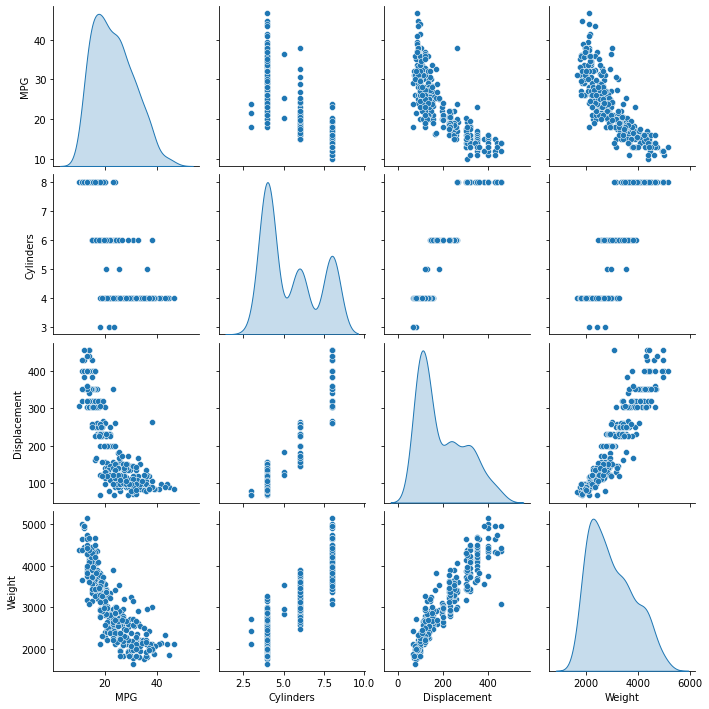

In [1]:
#자동차 연비 예측
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pathlib
import seaborn as sns


dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG', "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
#데이터 보면 tab뒤에 차종이 나와있음 comment를 이용해 공백을 주석으로 인식하게 한 뒤 원하는 정보를 가져올 수 있게 처리
#(skipinitialspace 스킵하겠다는 의미 = 스페이스 하나로만 인식하게끔) 

dataset = raw_dataset.copy() 
print(dataset.tail()) #결측값이 있는지 확인

print(dataset.isnull().sum()) #컬럼별 결측값 개수 구하기
dataset = dataset.dropna() #누락된 행 삭제

#Origin(원산지)은 범주형이므로 원-핫 인코딩으로 수치로 변환
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.tail()

#학습셋과 검증셋 분리 
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

# 몇개의 열을 선택해 산점도 행렬을 작성
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

#describe함수는 수치형 변수들만을 기준으로 카운트, 평균, 표준편차, 최소/최댓값, 4분위 수를 기준으로 25%, 50%, 75%에 
#해당하는 값을 테이블로 출력해줌
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose() # 그룹별 기술 통계량 - 옆으로 길게 표시 
print(train_stats)

#특성에서 타깃값 또는 "레이블"을 분리. 이 레이블을 예측하기 위해 모델을 훈련시킴
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

#데이터 정규화 함수 정의 
def norm(x):
  return(x-train_stats['mean']) / train_stats['std']

#train_dataset과 test_dataset을 분류
  normed_train_data = norm(train_dataset)
  normed_test_data = norm(test_dataset)

  model = tf.keras.Sequential()
  model.add(keras.layers.Dense(64, activation = 'relu', input_shape=[len(train_dataset.key())]))
  model.add(keras.layers.Dense(64, activation = 'relu'))
  model.add(keras.layers.Dense(1))
  optimizer = tf.keras.optimizers.RMSprop(0.001)
# mse - 측정항목을 평가한 결과는 모델을 학습시키는데 사용되지 않는 함수 
  model.compile(loss = 'mse', optimizer = optimizer, metrics=['mae', 'mse'])

#model을 확인해봄 
  example_batch = normed_train_data[:10]
  example_result = model.predict(example_batch)
  print(example_result)

#epoch가 끝날 때마다 (.)을 출력해 훈련 진행 과정을 표시 
  class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
      if epoch % 100 == 0:
        print('')
      print('.', end='')
    EPOCHS=1000
  #입력값을 필히 정규화된 값으로 넣어줘야 함
    history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, 
                        verbose = 0, callbacks=[PrintDot()])
  
  import matplotlib.pyplot as plt

  def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epochsplt.figure(figsize=(8, 12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0, 5]) #y 축 범위 설정
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0, 20]) #y축 범위 설정
    plt.legend()

    plt.show()

  plot_history(history)

#patience 매개 변수는 성능 향상을 체크할 에포크 횟수 
  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)

  history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                      validation_split = 0.2, verbose = 0, callbacks=[early_stop, PrintDot()])
  plot_history(history)




In [ ]:
dataset_pqth